# **RETAIL SALES DATA ANALYSIS**

# 🛍️ Retail Sales Data Analysis
**Purpose:** Explore trends in store performance, markdowns, and economic factors.


## Objectives
- Load and merge store, features, and sales data into a clean DataFrame.
- Analyze the impact of markdowns, holidays, and external factors on weekly sales.

## Inputs
- `stores_data_set.csv`, `features_data_set.csv`, `sales_data_set.csv` in /data folder.
- Python libraries: pandas, seaborn, plotly, os

## Outputs
- Merged DataFrame `df` ready for analysis.
- Visual outputs: trend line chart, scatter plot, box plot, heatmap.

## Additional Comments
- Working directory changed to project root for correct file paths.


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir
import os

current_dir = os.getcwd()
print("Current Directory:", current_dir)

# Move up if needed
#os.chdir(os.path.dirname(current_dir))
#print("New Directory:", os.getcwd())


Current Directory: c:\Users\petal\Downloads\CI-DBC\retail_sales_analysis\jupyter_notebooks


We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
#os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\petal\\Downloads\\CI-DBC\\retail_sales_analysis\\jupyter_notebooks'

# Section 1

Section 1 content

In [4]:
# Section 1: Load Data

In [5]:
import pandas as pd

stores = pd.read_csv('../data/stores_data_set.csv')
features = pd.read_csv('../data/features_data_set.csv')
sales = pd.read_csv('../data/sales_data_set.csv')

print("Stores Data:")
print(stores.head(), "\n")

print("Features Data:")
print(features.head(), "\n")

print("Sales Data:")
print(sales.head())


Stores Data:
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875 

Features Data:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.3

---

In [6]:
# Shape of each dataset
print("Stores shape:", stores.shape)
print("Features shape:", features.shape)
print("Sales shape:", sales.shape)

# Check missing values
print("\nMissing values in Stores:\n", stores.isnull().sum())
print("\nMissing values in Features:\n", features.isnull().sum())
print("\nMissing values in Sales:\n", sales.isnull().sum())


Stores shape: (45, 3)
Features shape: (8190, 12)
Sales shape: (421570, 5)

Missing values in Stores:
 Store    0
Type     0
Size     0
dtype: int64

Missing values in Features:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Missing values in Sales:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


### Stores: Clean, no missing data

### Sales: Clean, no missing data

### Features: Lots of missing values, especially in:

MarkDown1 to MarkDown5 (several missing)

CPI and Unemployment (585 rows missing)



# Section 2

### 🔍 Missing Values in Features Dataset

Before analysis could begin, we assessed the completeness of the `features_data_set.csv`. This visual highlights which variables contain missing values and the volume of those gaps.

💡 **Insight**:  
- `MarkDown` columns had significant missing values—expected, as promotions aren’t applied every week. These were logically filled with `0` to represent non-promotional periods.  
- `CPI` and `Unemployment` had occasional gaps. These were forward-filled to maintain the temporal continuity of economic indicators without introducing artificial values.


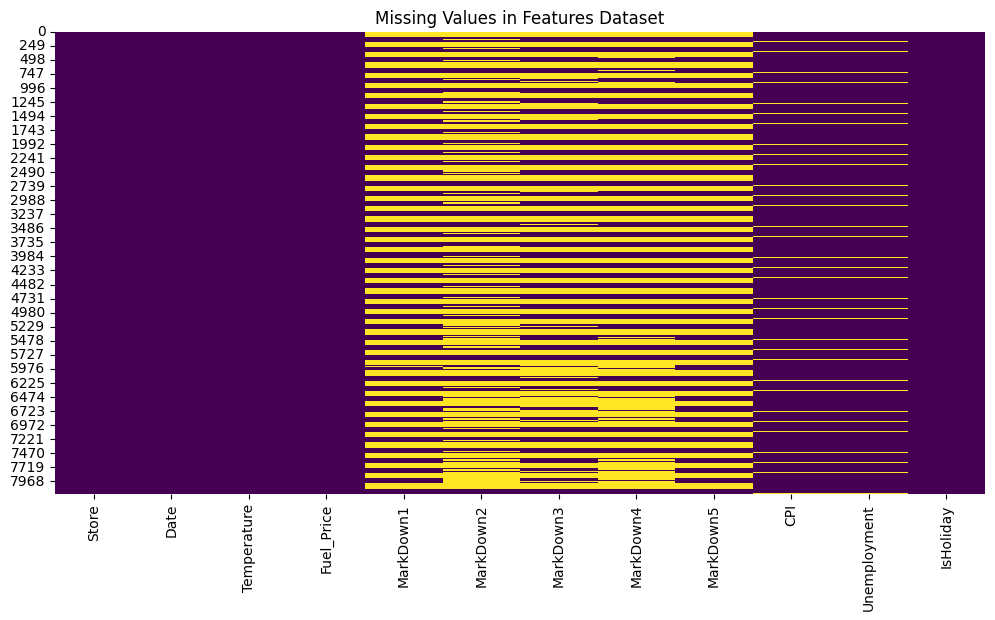

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(features.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Features Dataset")
plt.show()

In [8]:
# Fill missing markdowns with 0 (no promo that week)
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
features[markdown_cols] = features[markdown_cols].fillna(0)

# Forward-fill CPI and Unemployment
features[['CPI', 'Unemployment']] = features[['CPI', 'Unemployment']].ffill()


# Confirm it's clean now
print("Remaining nulls:\n", features.isnull().sum())


Remaining nulls:
 Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


### Filling Missing MarkDowns

Missing values in `MarkDown1` through `MarkDown5` were filled with 0.

Rationale:
- These values are likely missing by design (not by error).
- A missing value likely indicates that no promotion or markdown was applied for that particular week.
- Filling with 0 ensures accurate data aggregation without inflating any promotional impact.


---

### Forward-Filling CPI and Unemployment

Missing values in `CPI` and `Unemployment` were forward-filled.

Rationale:
- These are time-series macroeconomic indicators that change slowly.
- Forward fill ensures a consistent, temporally accurate estimate.
- This prevents data loss while preserving logical continuity in trends.


# Section 3

In [9]:
# Merge sales and features datasets on Store and Date
sales_features = pd.merge(sales, features, on=['Store', 'Date'], how='left')

# Merge the above with stores dataset on Store
full_data = pd.merge(sales_features, stores, on='Store', how='left')

# Confirm merge
print("Merged data shape:", full_data.shape)
full_data.head()



Merged data shape: (421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315


In [10]:
# Drop the duplicate IsHoliday column
full_data.drop(columns=['IsHoliday_y'], inplace=True)
full_data.rename(columns={'IsHoliday_x': 'IsHoliday'}, inplace=True)
print(full_data.columns)


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')


# Section 4

In [11]:
%pip install "nbformat>=4.2.0"

Note: you may need to restart the kernel to use updated packages.


### 📈 Total Weekly Sales Over Time

This line chart displays the overall sales trend across all stores, week by week.

💡 **Insight**:  
- Sharp spikes are clearly visible around **late November** and **late December**, corresponding to **Thanksgiving** and **Christmas** shopping periods.
- Some high-spend weeks (e.g., Christmas Eve 2011) were not flagged as holidays in the original dataset, prompting the creation of the `AdjustedHoliday` column to capture more **business-relevant seasonality**.


In [12]:
import plotly.express as px
full_data['Date'] = pd.to_datetime(full_data['Date'], dayfirst=True)
weekly_sales = full_data.groupby('Date')['Weekly_Sales'].sum().reset_index()
fig = px.line(weekly_sales, x='Date', y='Weekly_Sales', title='Total Weekly Sales Over Time')
fig.show()


c:\Users\petal\Downloads\CI-DBC\retail_sales_analysis\.venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


### 🎉 Sales Over Time: Holiday vs Non-Holiday Weeks

This line chart compares weekly sales during `IsHoliday=True` and `IsHoliday=False` periods.

💡 **Insight**:
- Clear spikes are seen during holiday periods, particularly in late November and late December.
- However, some key spikes occurred in weeks not originally flagged as holidays, revealing a **limitation in the dataset’s labeling**.
- This motivated the creation of the more inclusive `AdjustedHoliday` column to better reflect real-world retail behavior.


In [13]:
import plotly.express as px


In [14]:
holiday_trend = full_data.groupby(['Date', 'IsHoliday'])['Weekly_Sales'].sum().reset_index()

fig = px.line(
    holiday_trend,
    x='Date',
    y='Weekly_Sales',
    color='IsHoliday',
    title='Sales Over Time: Holidays vs Non-Holidays',
    labels={'IsHoliday': 'Holiday'}
)
fig.show()



c:\Users\petal\Downloads\CI-DBC\retail_sales_analysis\.venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [15]:
# Step 1: Define major holidays (custom)
import datetime

major_holidays = [
    datetime.datetime(2010, 12, 25),
    datetime.datetime(2011, 12, 25),
    datetime.datetime(2012, 12, 25),
    datetime.datetime(2010, 11, 25),  # Thanksgiving
    datetime.datetime(2011, 11, 24),
    datetime.datetime(2012, 11, 22),
    datetime.datetime(2011, 2, 6),    # Super Bowl 2011
    datetime.datetime(2012, 2, 5)     # Super Bowl 2012
]

# Step 2: Convert date column to datetime (just in case)
full_data['Date'] = pd.to_datetime(full_data['Date'], dayfirst=True)

# Step 3: Create new AdjustedHoliday column (True if within 7 days of major holiday)
full_data['AdjustedHoliday'] = full_data['Date'].apply(
    lambda d: any(abs((d - h).days) <= 7 for h in major_holidays)
)

# Preview the result
full_data[['Date', 'IsHoliday', 'AdjustedHoliday']].sample(5)


,Date,IsHoliday,AdjustedHoliday
85017,2012-04-20,False,False
285920,2010-08-06,False,False
275226,2010-09-24,False,False
345843,2011-01-21,False,False
129122,2010-11-19,False,True


### 🆚 Average Weekly Sales: AdjustedHoliday vs Non-Holiday Weeks

This boxplot compares weekly sales using the engineered `AdjustedHoliday` flag.

💡 **Key Insights**:
- While the difference in averages is not extreme, there is a clear uptick in sales during `AdjustedHoliday=True` weeks.
- This refined flag shows previously hidden spikes like Christmas Eve weeks, which the original `IsHoliday` column missed.
- It underscores the importance of business-aware feature engineering when analyzing seasonal retail trends.


In [16]:
import plotly.express as px

# Group by AdjustedHoliday and take the mean, not the sum
avg_sales = full_data.groupby('AdjustedHoliday')['Weekly_Sales'].mean().reset_index()

# Plot
fig = px.bar(avg_sales,
             x='AdjustedHoliday',
             y='Weekly_Sales',
             title='Average Weekly Sales: Adjusted Holiday vs Non-Holiday',
             labels={'Weekly_Sales': 'Average Weekly Sales'})
fig.show()



### 📉 Correlation Between Markdowns and Weekly Sales

To evaluate whether promotions drive sales, we plotted a lower triangle correlation heatmap between the five markdown features and weekly sales.

💡 **Key Insights**:
- `MarkDown1` and `MarkDown4` are highly correlated with each other (0.84), suggesting they are often used together.
- However, both exhibit **only weak correlations with `Weekly_Sales`** (~0.05), implying that markdowns alone do not predict revenue surges.

📌 **Takeaway**: Promotions may require **strategic timing**, such as alignment with holidays or specific departments, to effectively boost sales.


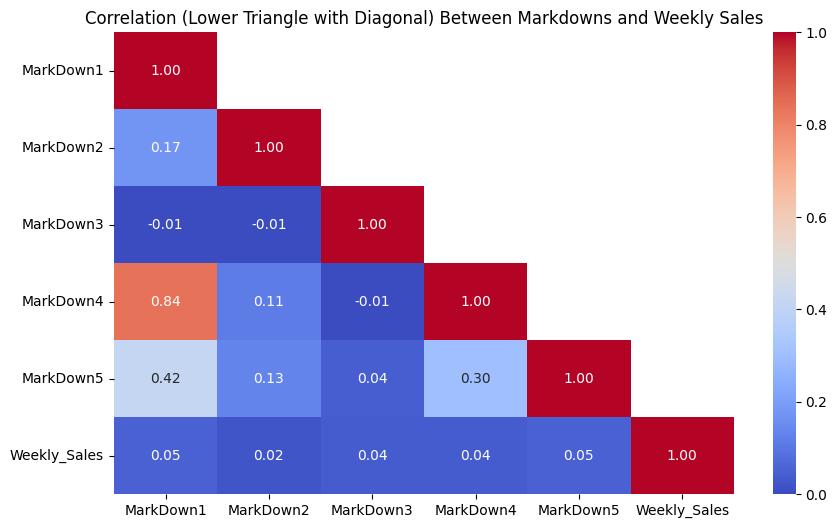

In [17]:
# Step 1: Check correlation between MarkDown features and Weekly Sales
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Weekly_Sales']
markdown_data = full_data[markdown_cols].copy()

# Step 2: Drop rows where all MarkDowns are missing
markdown_data.dropna(subset=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], how='all', inplace=True)

# Step 3: Fill remaining NaNs with 0 (assuming missing means no markdown)
markdown_data.fillna(0, inplace=True)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = full_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Weekly_Sales']].corr()

# Create a mask for the upper triangle *excluding* the diagonal
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Plot the lower triangle with the diagonal
plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', vmin=0, vmax=1)
plt.title("Correlation (Lower Triangle with Diagonal) Between Markdowns and Weekly Sales")
plt.show()




### 📽️ Weekly Sales Animation by Store

To visualise performance at the individual store level over time, we created an **animated bubble chart** with the following features:

- **X-axis**: Store ID  
- **Y-axis**: Weekly Sales  
- **Bubble Size & Color**: Represent relative sales volume  
- **Animation Frame**: Time (week-by-week)

🎯 **Insights Uncovered**:
- Clearly identifies **top-performing stores** (e.g., Stores 4, 13, 20 consistently appear dominant).
- Reveals **seasonal sales surges**, particularly around major holidays.
- Highlights variance in **store performance consistency**—some spike periodically while others maintain steady performance.

> This dynamic view allows decision-makers to spot standout performers and track momentum across the retail calendar.


In [18]:
df_anim = full_data.groupby(['Date', 'Store'])['Weekly_Sales'].sum().reset_index()

fig = px.scatter(
    df_anim,
    x="Store",
    y="Weekly_Sales",
    size="Weekly_Sales",
    color="Weekly_Sales",  # 🔁 Updated here
    animation_frame="Date",
    title="Weekly Sales Animation by Store",
    color_continuous_scale="Viridis",  # ✅ Optional but clearer
    range_y=[0, df_anim["Weekly_Sales"].max() * 1.1]
)
fig.show()




### 🏬 Weekly Sales Over Time – by Store Type

After identifying standout individual stores, we grouped performance by **Store Type** (A, B, and C) to analyse structural differences across formats.

📈 **Line Plot Observations**:
- **Type A stores consistently lead in weekly sales**, with more pronounced spikes during key retail weeks.
- Types B and C follow with noticeably lower volumes, suggesting smaller formats or less strategic locations.

🔍 **Insight**:
Type A stores—likely larger and more resource-equipped—drive the bulk of revenue. This segmentation highlights which store formats warrant more marketing support or investment.

✅ **Business Takeaway**:
Expanding or modeling new stores on the Type A format could potentially yield higher returns.


In [19]:
# Aggregate weekly sales per type across time
time_sales = full_data.groupby(['Date', 'Type'])['Weekly_Sales'].sum().reset_index()

fig = px.line(time_sales, x='Date', y='Weekly_Sales', color='Type', 
              title='Weekly Sales Over Time — By Store Type')
fig.show()


c:\Users\petal\Downloads\CI-DBC\retail_sales_analysis\.venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# Conclusions & Next Steps

## Conclusions
Holiday sales spikes are driven by specific key events, not holidays in general—averages hide the massive impact of events like Christmas.

Markdowns showed weak direct correlation with sales, suggesting that context and timing matter more than the discount itself.

Store Type A consistently outperforms others, highlighting a high-performing format worth deeper investment.

## Next Steps
Segment holiday types (e.g. Christmas vs. Thanksgiving) to quantify which drive the highest ROI.

Conduct cohort analysis by department or region to refine markdown targeting.

Incorporate external factors (e.g. inflation trends or regional weather anomalies) for advanced forecasting.

This project lays the foundation for data-driven decision-making in retail strategy—combining exploratory analysis with actionable insights for growth.



---